# Исследование объявлений о продаже квартир

Используя данные сервиса Яндекс.Недвижимость, необходимо определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
len_start = len(data)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

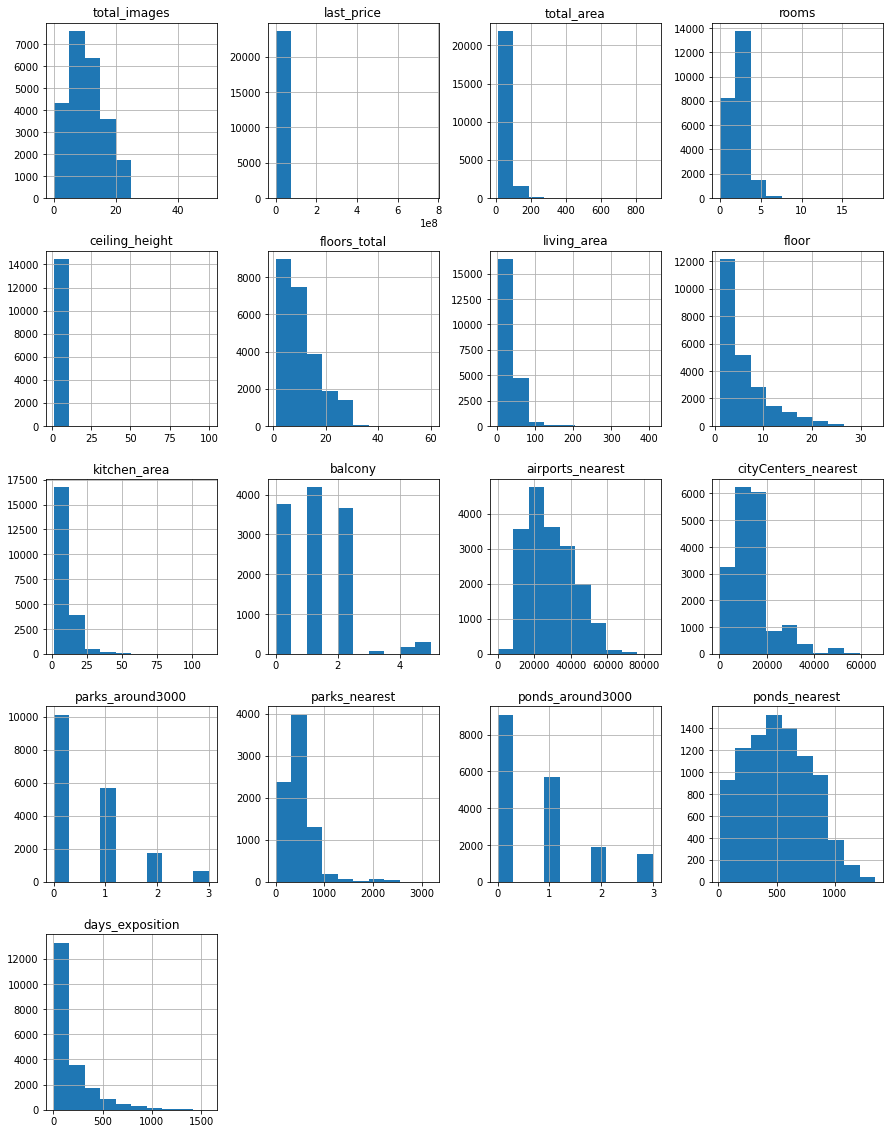

In [4]:
data.hist(figsize=(15, 20))
plt.show()

In [5]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Вывод: в таблице 22 столбца. Типы данных в столбцах: int64, float64, bool, object.

Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

По построенным гистограммам для всех столбцов и матрице корреляции можно сделать первые выводы о входных данных: аномальные значения в высоте потолков, зависимость цены квартиры от общей площади и т.д.

### Предобработка данных

#### Изучим пропущенные значения

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Исследуем пропущенные значения в столбце ceiling_height - высота потолков. Пропущенных значений достаточно много, но заполнять их медианными занчениями по категориям не предоставляется возможным, так как зависомости высоты потолков от какого-либо другого параметра по изученным данным и по матрице корреляции в первом пункте найдено не было. Заполнять медианным занчением по всем данным высоты потолков нецелесообразно, так как можно исказить данные. Возможная причина возникновения пропусков - пользователь не заполнил нужную графу, так как не знал высоту потолков в квартире.

In [11]:
data.query('ceiling_height.isna()').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


Исследуем пропущенные значения в столбце floors_total - всего этажей в доме. Пропущенных значений немного, поэтому удалим их.

In [12]:
data = data.dropna(subset=['floors_total'])

Проверим, что этаж, на котором располгается квартира, не превышает общего количество этажей в доме

In [13]:
(data['floors_total'] < data['floor']).sum()

0

Исследуем пропущенные значения в столбцах living_area - жилая площадь в квадратных метрах, kitchen_area - площадь кухни в квадратных метрах

In [14]:
data.query('studio == True | open_plan == True').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.00,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


В квартирах открытой планировки и студиях не была задана площадь кухни, так как данный тип планировки подразумевает отсутствие кухни. Остальные пропуски могли быть связаны с тем, что пользователь не заполнил нужную графу. Заполнять пропуски не будем, так как не был найден код фильтрации, при котором не появлялись бы аномалии в значениях.

Для дальнейшего исследования уберем строки, где общая площаль квартиры меньше суммарной площади кухни и жилого помещения.

In [15]:
(data['living_area'] + data['kitchen_area'] >= 0.9 * data['total_area']).sum()

474

In [16]:
data = data.query('living_area + kitchen_area  <= total_area | kitchen_area.isna()')

Исследуем пропущенные значения в столбце is_apartment - апартаменты. Пропущенные значения в данном столбце могли возникуть по причине того, что квартира не является апартаментами, поэтому пользователь не заполнил данную графу. Заполним пропуски в данном столбце булевым значением False.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Исследуем пропущенные значения в столбцах balcony - число балконов, parks_around3000 - число парков в радиусе 3 км, ponds_around3000 - число водоемов в радиусе 3 км. Пропуски в стоблце с количеством балконом могли возникнуть по причине того, что в квартире нет балконов, поэтому пользователь не заполнил данную графу. Заполним пропуски в столбце с количеством балконов нулями. Пропуски в столбцах с числом парков и водоемов в радиусе 3 км связаны с тем, что парков и водоемов в радиусе 3 км нет. Данные этих столбцов являются картографическими: при отсутствии парка или водоема значение ноль не проставлялось, графа оставалась пустой. Заполним пропуски в этих стоблцах нулями.

Проверим, что при пропусках в стоблцах с числом парков и водоемов в радиусе 3 км, в стоблцах с расстоянием до парков и водоемов нет значений расстояний меньше 3 км.

In [19]:
((data['parks_around3000'].isna()) & (data['parks_nearest'] <= 3000)).sum()

0

In [20]:
((data['ponds_around3000'].isna()) & (data['ponds_nearest'] <= 3000)).sum()

0

Действительно, таких строк нет. Значит, можно заполнить пропуски нулями. 

In [21]:
columns_to_replace = ['balcony', 'parks_around3000', 'ponds_around3000']
for name in columns_to_replace:
    data[name] = data[name].fillna(0)

Исследуем пропущенные значения в столбце locality_name - название населённого пункта. Пропусков немного, заполним их значениями 'unknown'. Пропуски могли быть допущены по причине того, что пользователь не заполнил нужную графу. 

In [22]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Исследуем пропущенные значения в столбце airports_nearest - расстояние до ближайшего аэропорта в метрах, cityCenters_nearest - расстояние до центра города, parks_nearest - расстояние до ближайшего парка, ponds_nearest - расстояние до ближайшего водоёма. Рассмотрим на примере пропущенных значений в столбце с расстоянием до ближайшего парка. Можно обратить внимание, что при пропусках в столбце с расстоянием до ближайшего парка в стоблце с количеством парков стоит ноль. Пропуски в данных столбцах  связаны с тем, что по близости отсуствовали парки, водоемы, аэропорты и крупные города, значения в данных столбцах просто не заполнялись. Оставим значения пустыми, так как замену предложить невозможно.

In [23]:
data.query('parks_nearest.isna()').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,False,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,NaN,17.0,16.50,7,False,False,False,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
19,16,14200000.0,121.00,2019-01-09T00:00:00,3,2.75,16.0,76.00,8,False,False,False,12.00,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0


In [24]:
((data['ponds_around3000'] != 0) & (data['ponds_nearest'].isna())).sum()

0

Исследуем пропущенные значения в столбце days_exposition - сколько дней было размещено объявление. Зависимостей для данного столбца не было найдено. Логичную замену предложить невозможно, оставим значения пустыми.

In [25]:
data.query('days_exposition.isna()').sort_values(by = 'first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15857,6,25000000.0,145.20,2014-11-27T00:00:00,3,NaN,5.0,60.70,5,False,False,False,40.20,0.0,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
3291,8,8200000.0,52.50,2014-11-27T00:00:00,1,NaN,8.0,21.50,2,False,False,False,15.10,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3873,7,20100000.0,117.60,2014-11-27T00:00:00,3,NaN,8.0,62.50,7,False,False,False,21.50,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
6922,17,29999000.0,133.50,2014-12-08T00:00:00,3,3.0,15.0,71.70,12,False,False,False,19.80,2.0,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN
15614,3,19400000.0,117.70,2014-12-09T00:00:00,3,3.0,8.0,62.60,5,False,False,False,21.30,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,16,8800000.0,80.00,2019-05-03T00:00:00,3,2.8,17.0,31.00,15,False,False,False,27.00,2.0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,NaN
10917,20,10000000.0,62.30,2019-05-03T00:00:00,2,NaN,6.0,20.00,3,False,False,False,30.00,0.0,Санкт-Петербург,25083.0,3148.0,2.0,629.0,0.0,NaN,NaN
8170,4,3280000.0,38.19,2019-05-03T00:00:00,1,NaN,6.0,14.41,4,False,False,False,10.26,0.0,городской посёлок Новоселье,NaN,NaN,0.0,NaN,0.0,NaN,NaN
13746,10,7790000.0,42.30,2019-05-03T00:00:00,1,NaN,17.0,18.80,9,False,False,False,11.70,2.0,Санкт-Петербург,39065.0,12241.0,1.0,192.0,0.0,NaN,NaN


In [26]:
data.groupby('days_exposition')['days_exposition'].count()

days_exposition
1.0         1
2.0         3
3.0       152
4.0       174
5.0       148
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1131, dtype: int64

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8885
floors_total                0
living_area              1431
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5361
cityCenters_nearest      5338
parks_around3000            0
parks_nearest           15206
ponds_around3000            0
ponds_nearest           14233
days_exposition          3077
dtype: int64

Вывод: Были найдены и заменены полностью или частично пропущенные данные в столбцах 'floors_total', 'is_apartment', 'balcony', 'locality_name', 'parks_around3000', 'ponds_around3000'. Были установлены возможные причины пропусков: пользователь не заполнил нужную графу, значения пропускались при отсутствии водоемов, парков, аэропортов и крупных городов на нужном расстоянии при заполнении картографических данных и т.д. 

#### Изменение типов данных

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23110 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23110 non-null  int64  
 1   last_price            23110 non-null  float64
 2   total_area            23110 non-null  float64
 3   first_day_exposition  23110 non-null  object 
 4   rooms                 23110 non-null  int64  
 5   ceiling_height        14225 non-null  float64
 6   floors_total          23110 non-null  float64
 7   living_area           21679 non-null  float64
 8   floor                 23110 non-null  int64  
 9   is_apartment          23110 non-null  bool   
 10  studio                23110 non-null  bool   
 11  open_plan             23110 non-null  bool   
 12  kitchen_area          20879 non-null  float64
 13  balcony               23110 non-null  float64
 14  locality_name         23110 non-null  object 
 15  airports_nearest   

In [29]:
value_type_old = ['last_price', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total']

for name in value_type_old:
    data[name] = data[name].astype(int)

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23110 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23110 non-null  int64         
 1   last_price            23110 non-null  int64         
 2   total_area            23110 non-null  float64       
 3   first_day_exposition  23110 non-null  datetime64[ns]
 4   rooms                 23110 non-null  int64         
 5   ceiling_height        14225 non-null  float64       
 6   floors_total          23110 non-null  int64         
 7   living_area           21679 non-null  float64       
 8   floor                 23110 non-null  int64         
 9   is_apartment          23110 non-null  bool          
 10  studio                23110 non-null  bool          
 11  open_plan             23110 non-null  bool          
 12  kitchen_area          20879 non-null  float64       
 13  balcony         

Вывод: Были заменены вещественные типы данных на целочисленные в столбцах 'last_price', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', так как значения в данных столбцах явялются целыми. Был заменен тип данных с object на datetime в столбце 'first_day_exposition'.

#### Поиск и замена дубликатов

Проверим, присутствуют ли неявные дубликаты.

In [32]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Неявные дубликаты присутсвуют: 'поселок городского типа', 'городской поселок', 'посёлок', 'поселок станции', 'городской посёлок', 'посёлок станции', 'посёлок городского типа', 'коттеджный поселок городского типа', 'поселок городского типа станции', 'посёлок при железнодорожной станции', 'коттеджный поселок', 'поселок при железнодорожной станции' заменим на 'поселок'; 'садоводческое некоммерческое товарищество' заменим на 'садовое товарищество'.

In [33]:
value_replace_in = [[
    'поселок городского типа','городской посёлок', 'коттеджный поселок',
    'поселок станции', 'городской поселок','коттеджный посёлок',
    'посёлок городского типа', 'посёлок при железнодорожной станции',
    'поселок городского типа станции','поселок при железнодорожной станции', 'посёлок станции', 'поселок', 'посёлок'], 
    ['садоводческое некоммерческое товарищество']]
value_replace_out = ['п.', 'садовое товарищество']

for i in range(len(value_replace_in)):
    for j in range(len(value_replace_in[i])):
        data['locality_name'] = data['locality_name'].str.replace(value_replace_in[i][j], value_replace_out[i])

In [34]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
      

Проверим, присутствуют ли явные дубликаты.

In [35]:
data.duplicated().sum()

0

In [36]:
data.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms']).sum()

196

Явные дубликаты присутствуют, удалим их.

In [37]:
data = (
        data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms'])
        .reset_index(drop=True)
        );

In [38]:
data.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms']).sum()

0

Вывод: Были найдены и заменены явные и неявные дубликаты. 

#### Поиск и исправление аномальных значений

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22914.000000,2.291400e+04,22914.000000,22914.000000,14120.000000,22914.000000,21503.000000,22914.000000,20709.000000,22914.000000,17690.000000,17713.000000,22914.000000,7880.000000,22914.000000,8849.000000,19872.000000
mean,9.911757,6.523857e+06,60.225319,2.072925,2.768774,10.670682,34.457569,5.872916,10.511903,0.586279,28763.738949,14207.123186,0.473117,490.160025,0.592389,519.327947,180.646488
std,5.693696,1.085330e+07,35.242279,1.081926,1.243657,6.586711,22.066882,4.866264,5.838820,0.952224,12647.329867,8633.580632,0.750505,339.122731,0.883047,277.925827,219.091261
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9254.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26665.500000,13107.000000,0.000000,455.000000,0.000000,503.000000,96.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37199.000000,16275.000000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проверим аномалии и редкости в колонках 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'.

In [41]:
data['rooms'].value_counts().to_frame()

,rooms
1,7773
2,7656
3,5631
4,1152
5,317
0,194
6,102
7,58
8,12
9,8


Квартиры больше 7 комнат можно считать редкостью.

In [42]:
data = data.query('rooms < 8')

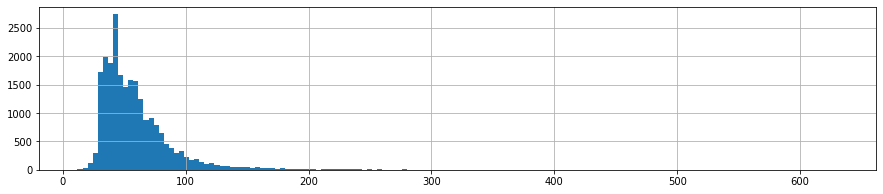

In [43]:
data['total_area'].hist(bins = 150, figsize = (15,3));

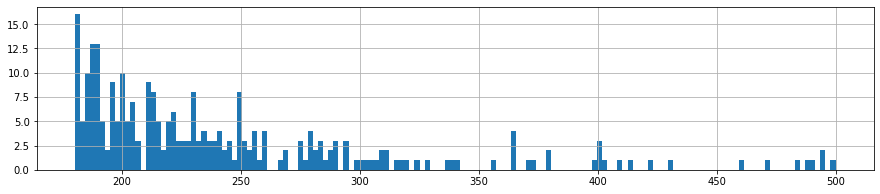

In [44]:
data['total_area'].hist(bins = 150, figsize = (15,3), range = (180,500));

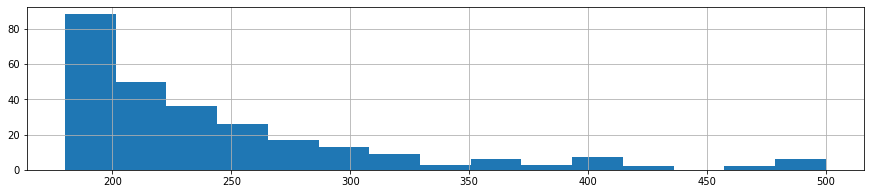

In [45]:
data['total_area'].hist(bins = 15, figsize = (15,3), range = (180,500));

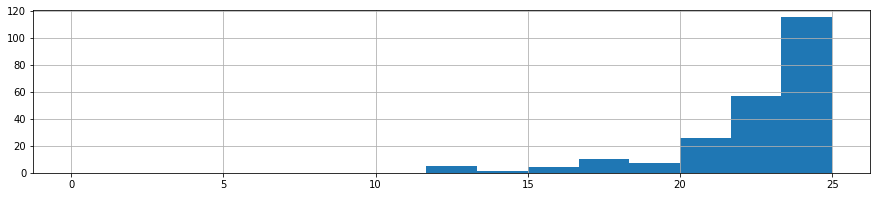

In [46]:
data['total_area'].hist(bins = 15, figsize = (15,3), range = (0,25));

Квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями.

In [47]:
data = data.query('total_area > 20 & total_area < 250')

Аномальные значения встречаются в минимальной и максимальной высоте потолка. Высота потолков в 25 м невозможна: можно предположить, что имееется ввиду 2,5 м. Исправим аномальные значения путем деления на 10.

In [48]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10)

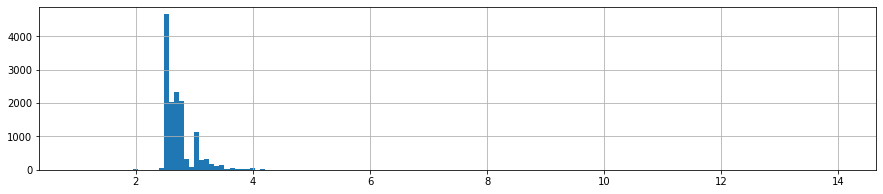

In [49]:
data['ceiling_height'].hist(bins = 150, figsize = (15,3));

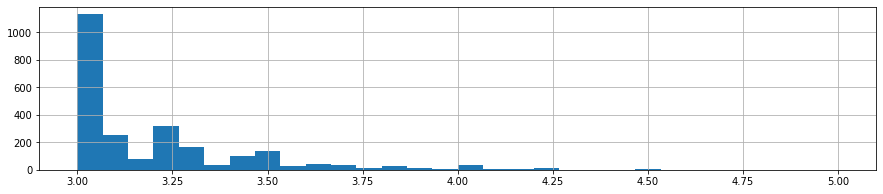

In [50]:
data['ceiling_height'].hist(bins = 30, figsize = (15,3), range = (3, 5));

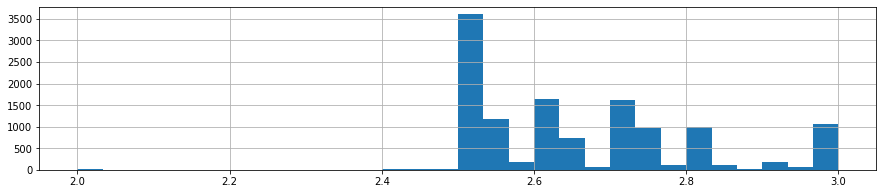

In [51]:
data['ceiling_height'].hist(bins = 30, figsize = (15,3), range = (2, 3));

Ограничим максимальную и минимальную высоту потолков от 2.4 до 4 метров и уберем выходящие за данный диапазон значения.

In [52]:
data = data.query('ceiling_height > 2.4 & ceiling_height < 4 | ceiling_height.isna()')

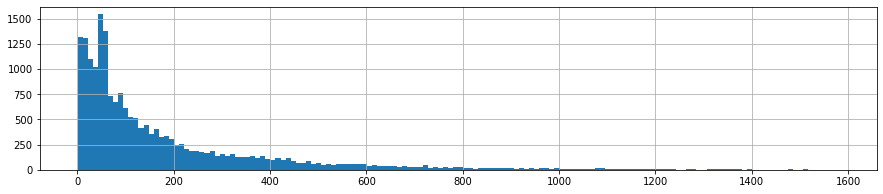

In [53]:
data['days_exposition'].hist(bins = 150, figsize = (15,3));

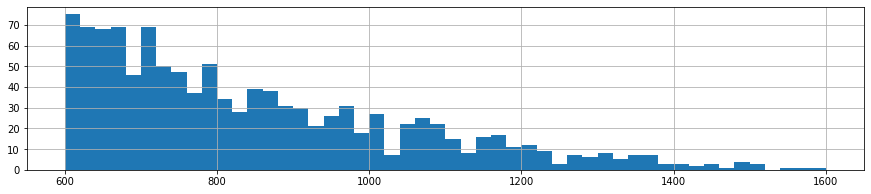

In [54]:
data['days_exposition'].hist(bins = 50, figsize = (15,3), range = (600, 1600));

Количество дней размещения объявления больше 1100 можно считать редкостью.

In [55]:
data = data.query('days_exposition < 1100 | days_exposition.isna()')

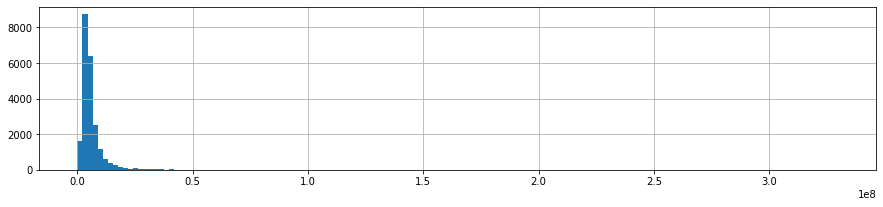

In [56]:
data['last_price'].hist(bins = 150, figsize = (15,3));

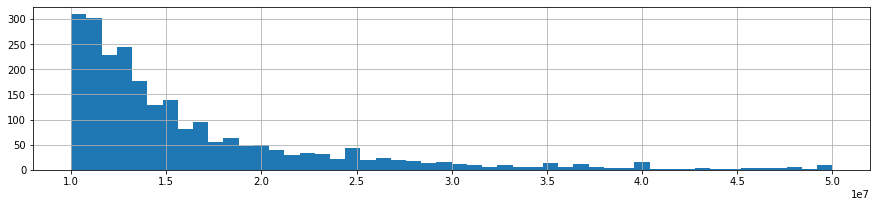

In [57]:
data['last_price'].hist(bins = 50, figsize = (15,3), range = (10000000, 50000000));

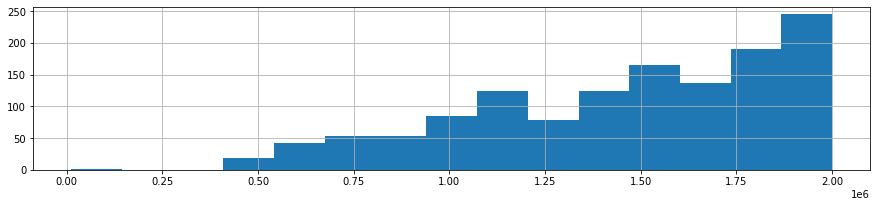

In [58]:
data['last_price'].hist(bins = 15, figsize = (15,3), range = (12000, 2000000));

Цены на квартиры за границами диапазона 0.5 миллионов - 4 миллионов можно считать редкостью.

In [59]:
data = data.query('last_price > 500000 & last_price < 40000000')

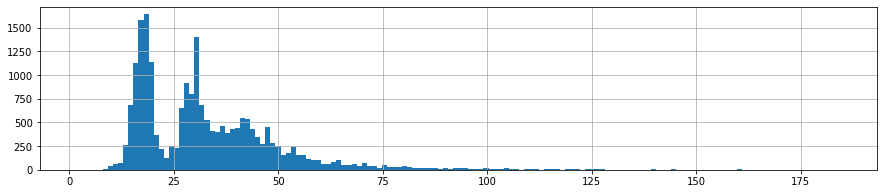

In [60]:
data['living_area'].hist(bins = 150, figsize = (15,3));

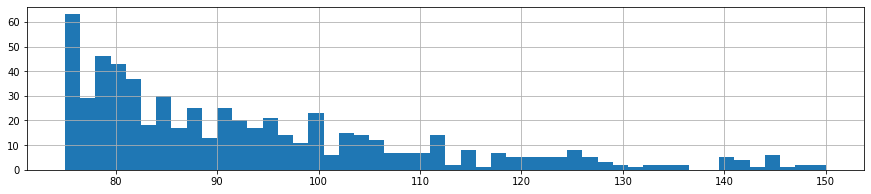

In [61]:
data['living_area'].hist(bins = 50, figsize = (15,3), range = (75, 150));

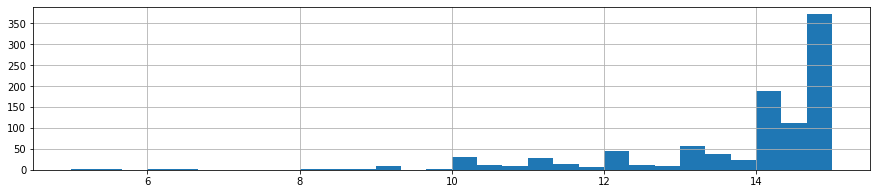

In [62]:
data['living_area'].hist(bins = 30, figsize = (15,3), range = (5, 15));

Жилая площадь за диапазоном 10 квадратных метров - 120 квадратных метров считается редкостью.

In [63]:
data = data.query('living_area > 10 & living_area < 120 | living_area.isna()')

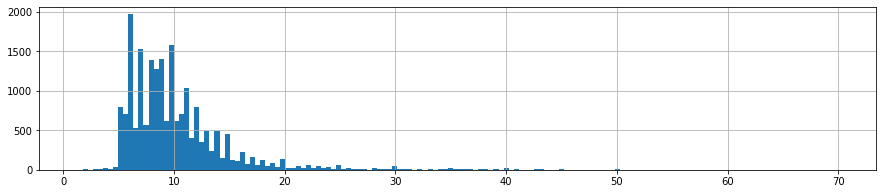

In [64]:
data['kitchen_area'].hist(bins = 150, figsize = (15,3));

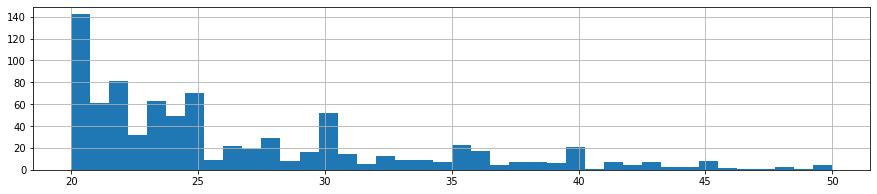

In [65]:
data['kitchen_area'].hist(bins = 40, figsize = (15,3), range = (20, 50));

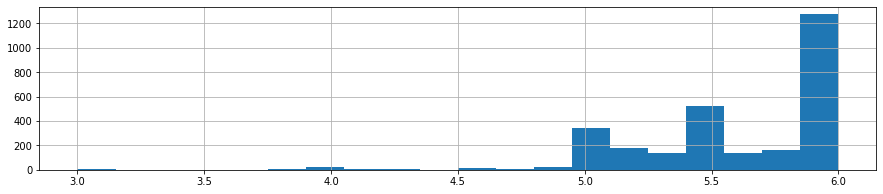

In [66]:
data['kitchen_area'].hist(bins = 20, figsize = (15,3), range = (3, 6));

Площадь кухни за диапазоном 4.5 квадратных метров - 40 квадратных метров считается редкостью.

In [67]:
data = data.query('kitchen_area > 4.5 & kitchen_area < 40 | kitchen_area.isna()')

In [68]:
data['floors_total'].value_counts().to_frame()

,floors_total
5,5346
9,3646
16,1320
12,1309
10,1128
4,1079
25,1033
17,799
6,780
3,605


Количество этажей больше 27 можно считать редкостью.

In [69]:
data = data.query('floors_total < 28')

In [70]:
100 - len(data) / len_start * 100

7.101565466897341

Вывод: Были убраны аномальные значения и редкости в колонках 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'. Процент потери данных после обработки составил 7 %, что является допустимым.

In [76]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,016.00","22,016.00","13,502.00","19,130.00","22,016.00","20,661.00","19,915.00","22,016.00","22,016.00"
min,0.00,20.10,2.45,1.00,"520,000.00",10.08,4.60,1.00,1.00
max,7.00,240.00,3.98,"1,099.00","39,990,000.00",119.90,39.90,27.00,27.00
median,2.00,51.30,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00


### Посчитаем и добавим в таблицу новые столбцы

Добавим новый столбец в таблицу - цена одного квадратного метра.

In [84]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']

Добавим новый столбец в таблицу - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее). Номера были проставлены для удобства просмотра гистограмм.

In [85]:
def categorize_first_day_exposition(day):
    try:
        if day == 0:
            return '1 - понедельник'
        elif day == 1:
            return '2 - вторник'
        elif day == 2:
            return '3 - среда'
        elif day == 3:
            return '4 - четверг'
        elif day == 4:
            return '5 - пятница'
        elif day == 5:
            return '6 - суббота'
        elif day == 6:
            return '7 - воскресенье'
    except:
        pass

In [86]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday.apply(categorize_first_day_exposition)

Добавим новый столбец в таблицу - месяц публикации объявления.

In [87]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавим новый столбец в таблицу - год публикации объявления.

In [88]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим новый столбец в таблицу - тип этажа квартиры (значения — «первый», «последний», «другой»).

In [89]:
def categorize_floor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [90]:
data['floor_category'] = data.apply(categorize_floor, axis = 1) 

Добавим новый столбец в таблицу - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [91]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [92]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,4 - четверг,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,п. Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,2 - вторник,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,4 - четверг,8,2015,другой,14.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,п. Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,1 - понедельник,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,п. Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,4 - четверг,11,2017,другой,19.0
7,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,п. Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.764777,3 - среда,5,2018,другой,NaN
8,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,7 - воскресенье,2,2017,другой,15.0
9,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525,4 - четверг,11,2017,другой,14.0
10,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0,75000.000000,1 - понедельник,8,2018,другой,52.0
11,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.0,72037.037037,4 - четверг,6,2016,последний,NaN


Выводы: Были посчитаны и добавлены новые столбцы в таблицу: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

### Проведем исследовательский анализ данных

#### Построим гистограммы

Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

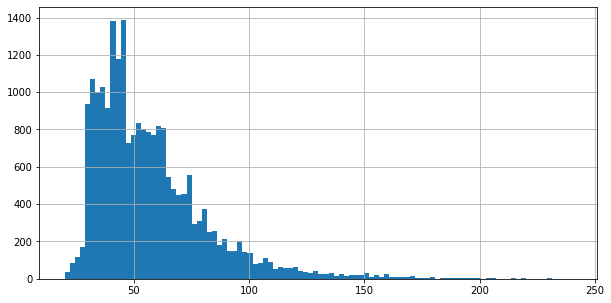

In [93]:
data['total_area'].hist(bins=100, figsize=(10, 5));

По гистограмме общей площади квартиры можно сделать вывод, что наибольшее число объявлений выставлено о продаже квартир площадью 25-60 метров квадратных, и данную выборку целесообразно анализировать в дальнейшем. Наибольшее число объявлений выставлено о продаже квартир площадью около 40 метров квадратных. Квартиры с общей площадью больше 100 квадратных метров реже выставляются на продажу. Гистограмма похожа на распределение Пуассона.

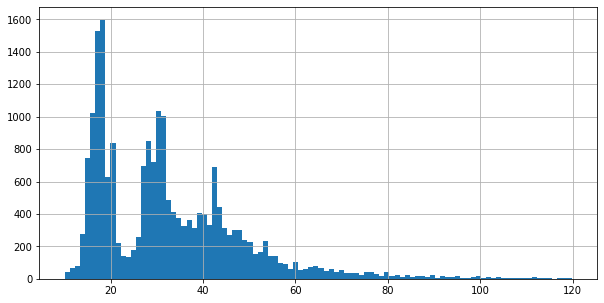

In [94]:
data['living_area'].hist(bins=100, figsize=(10, 5));

По гистограмме жилой площади можно сделать вывод, что чаще всего продают квартиры с жилой площадью 16-20 метров квадратных и 27-33 метров квадратных. Квартиры с жилой площадью больше 60 квадратных метров реже выставляются на продажу.

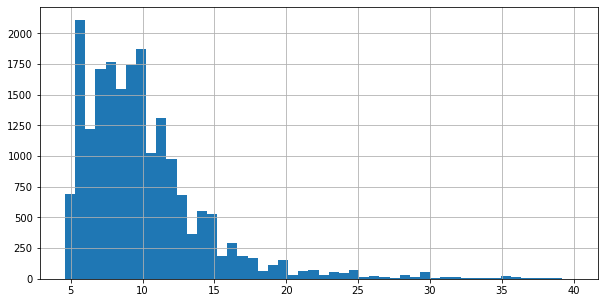

In [95]:
data['kitchen_area'].hist(bins=50, figsize=(10, 5));

По гистограмме площади кухни можно сделать вывод, что большая часть кухонь в продаваемых квартирах имеет площадь 6-10 метров квадратных, и данную выборку целесообразно анализировать в дальнейшем. Квартиры с кухнями больше 15 квадратных метров реже выставляются на продажу. Гистограмма похожа на распределение Пуассона.

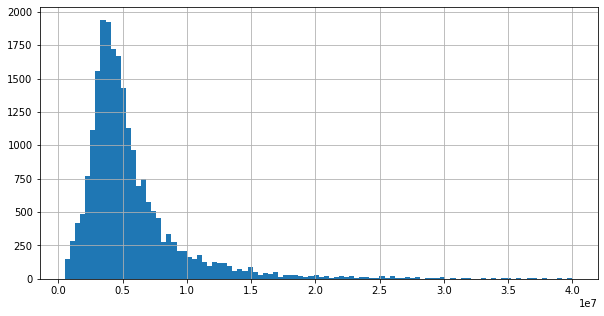

In [96]:
data['last_price'].hist(bins=100, figsize=(10, 5));

По гистограмме цены на момент снятия с продажи можно заметить ее сходство с распределнием Пуассона. Чаще всего приобретают квартиры в ценовом диапазоне 2.5 - 5.5 млн. рублей, реже всего при цене квартиры больше 15 млн. рублей.

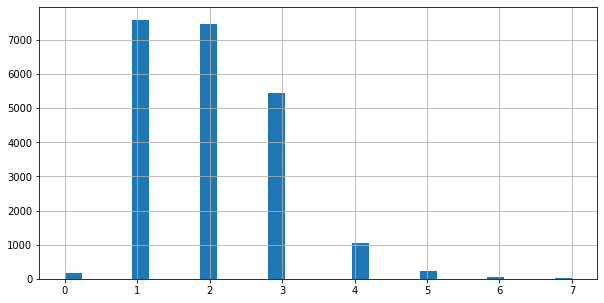

In [97]:
data['rooms'].hist(bins=30, figsize=(10, 5));

По гистограмме количества комнат видно, что чаще всего встречаются в продаже квартиры с 1, 2 и 3 комнатами. 

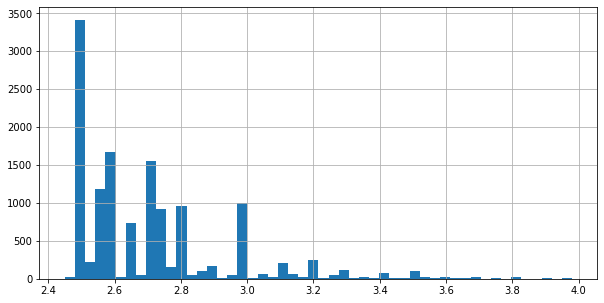

In [98]:
data['ceiling_height'].hist(bins=50, figsize=(10, 5));

По гистограмме высоты потолков видно, что большая часть квартир имеет высоту потолков 2.5 - 2.8 и 3 метра. Квартиры с высотой потолков 2.8 - 3 метра и 3 - 4 метра встречаются значительно реже.

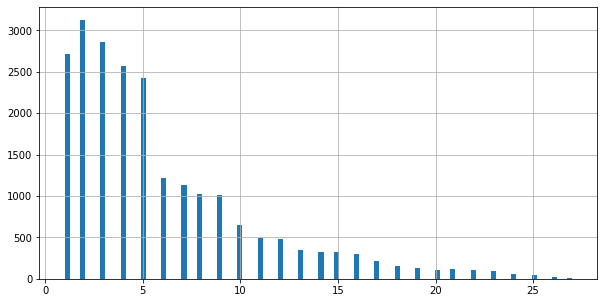

In [99]:
data['floor'].hist(bins=100, figsize=(10, 5));

По гистограмме этажей, на которых расположены квартиры, можно заметить ее сходство с распределнием Пуассона. Чаще всего продают квартиры на 1-5 этажах, что связано с тем, что чаще всего продают квартиры в пятиэтажных зданиях (см. гистограмму количества этажей в здании). На втором месте по "популярности" квартиры на 6-9 этажах, что подтверждает связь с этажностю зданий (также см. гистограмму количества этажей в здании).

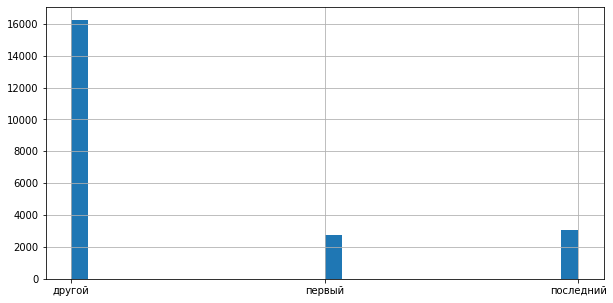

In [100]:
data['floor_category'].hist(bins=30, figsize=(10, 5));

По гистограмме типов этажей видно, что квартиры на первом и последнем этажах зданий продаются с примерно одинаковой частотой, но чаще всего продают квартиры на этажах кроме первого и последнего.

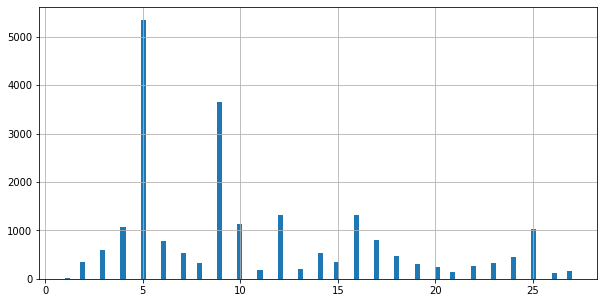

In [101]:
data['floors_total'].hist(bins=100, figsize=(10, 5));

Из гистограммы количества этажей в здании видно, что чаще всего выставляют на продажу квартиры в пяти- и девятиэтажных зданиях. Четырех-, десяти-, двенадцати- и шестнадцатиэтажные здания - вторые по популярности. Здания этажности, отличной от вышеперечисленных, встречаются значительно реже.

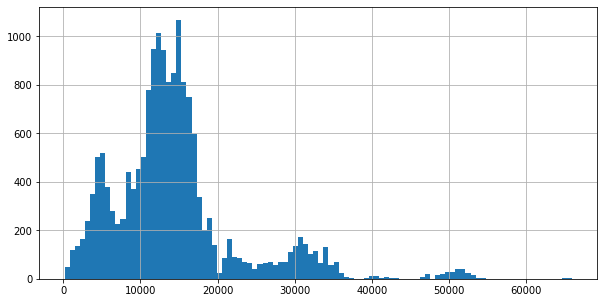

In [102]:
data['cityCenters_nearest'].hist(bins=100, figsize=(10, 5));

Гистограмма удаленности квартир от центра имеет два пика, один из которых более узкий и отмечает удаленность от центра на расстояние около 5км, а второй - более широкий - на растояние от 12км до 16км. Квартиры на расстоянии около 2км и 18км - 35км выставляются на продажу с примерно одинаковой частотой. Квартиры, расположенные в менее, чем 1км от центра и более чем в 35км продаются одинаково редко по сравнению с остальными.

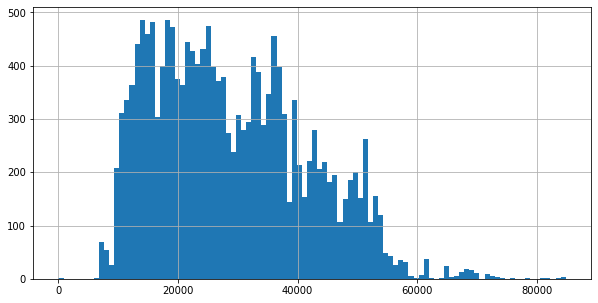

In [103]:
data['airports_nearest'].hist(bins=100, figsize=(10, 5));

Гистограмма близости к аэропорту показывает, что квартиры на расстоянии около 30км и более 37км от аэропорта одинаково непопулярны среди покупателей. Также квартиры с самым близким расположением к аэропорту редко выставляются на продажу.

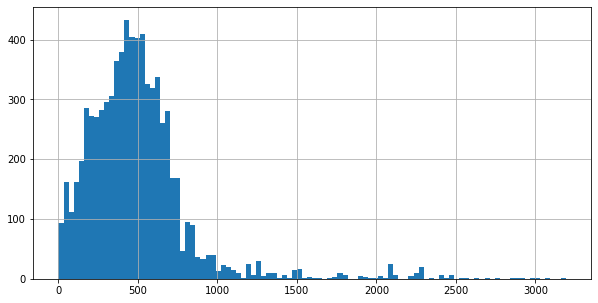

In [104]:
data['parks_nearest'].hist(bins=100, figsize=(10, 5));

Гистограмма близости к паркам показывает, что чаще всего продаются квартиры на расстоянии от 150 до 650 метров до ближайшего парка. При расстоянии более 1 км. объявлений о продаже значительно меньше.

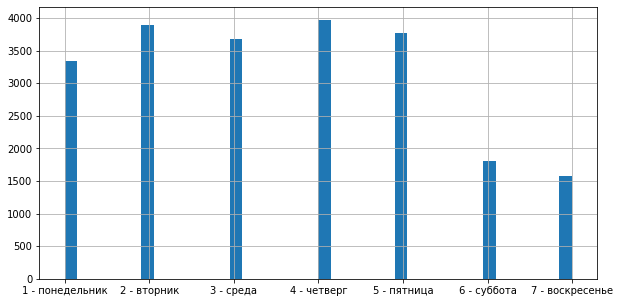

In [105]:
data['day_exposition'].sort_values().hist(bins=40, figsize=(10, 5));

Гистограмма дней выставления объявления показывает, что реже всего выставляют квартиры на продажу в выходные, а понедельник, среда и пятница чуть менее популярны для выставления объявления о продаже, чем вторник и четверг.

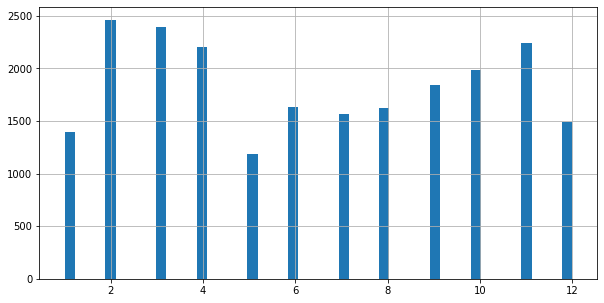

In [106]:
data['month_exposition'].hist(bins=50, figsize=(10, 5));

Гистограмма месяцев выставления объявления о продаже показывает, что Декабрь, Январь, Май и Июнь менее популярны, чем остальные месяцы в году. Большее число объявлений выставляется в холодное время года, т.е. с Февраля по Апрель и в Октябре и Ноябре, нежели в теплое время года.

#### Изучим, как быстро продавались квартиры

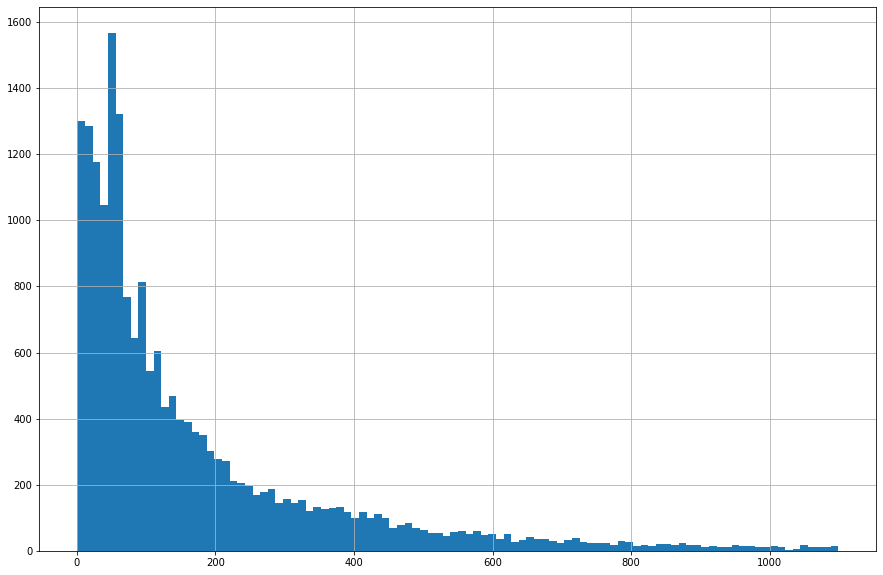

In [107]:
data['days_exposition'].hist(bins=100, figsize=(15, 10));

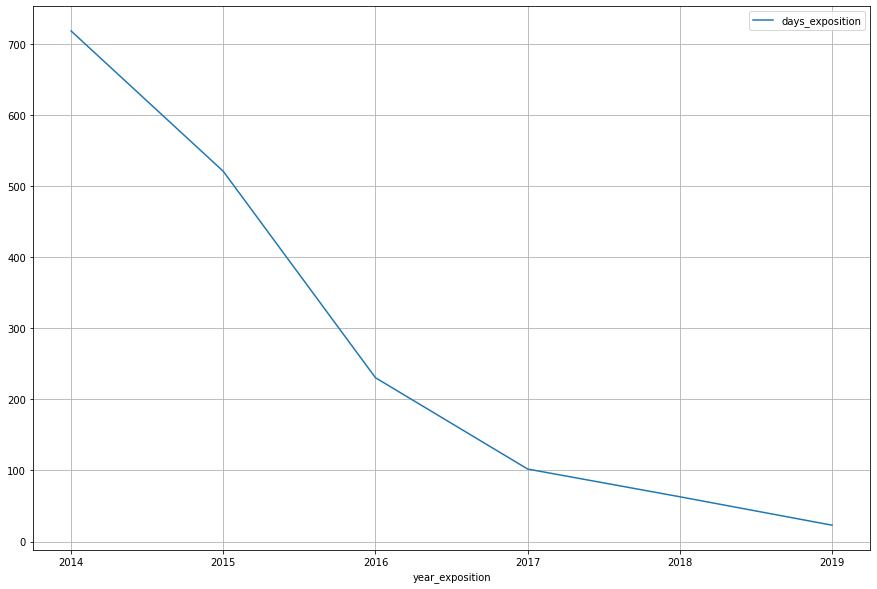

In [108]:
(
    data.pivot_table(index='year_exposition', values='days_exposition', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

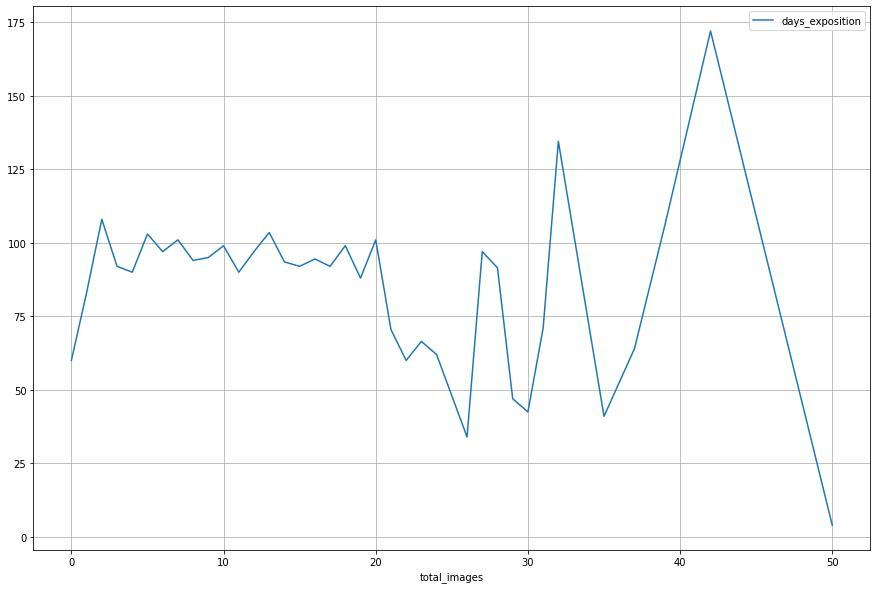

In [109]:
(
    data.pivot_table(index='total_images', values='days_exposition', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

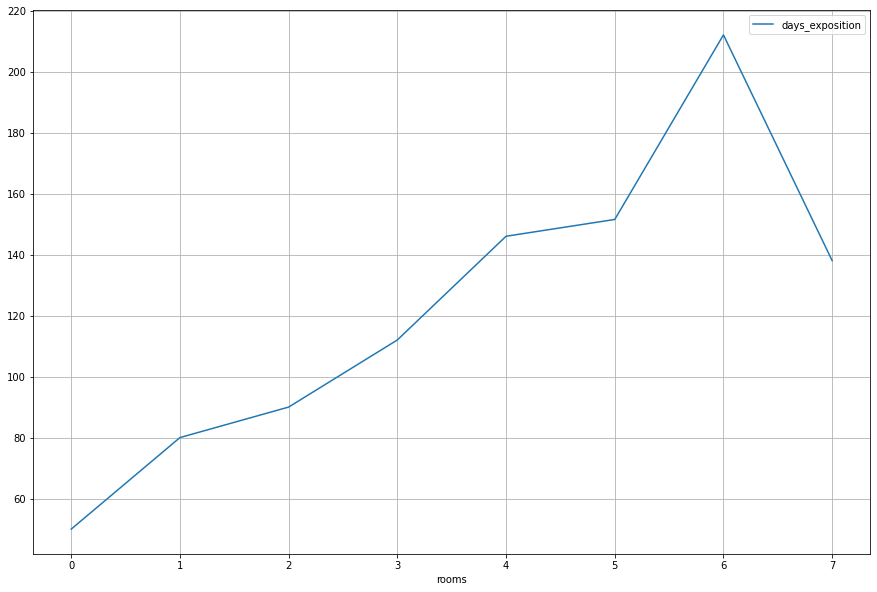

In [110]:
(
    data.pivot_table(index='rooms', values='days_exposition', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

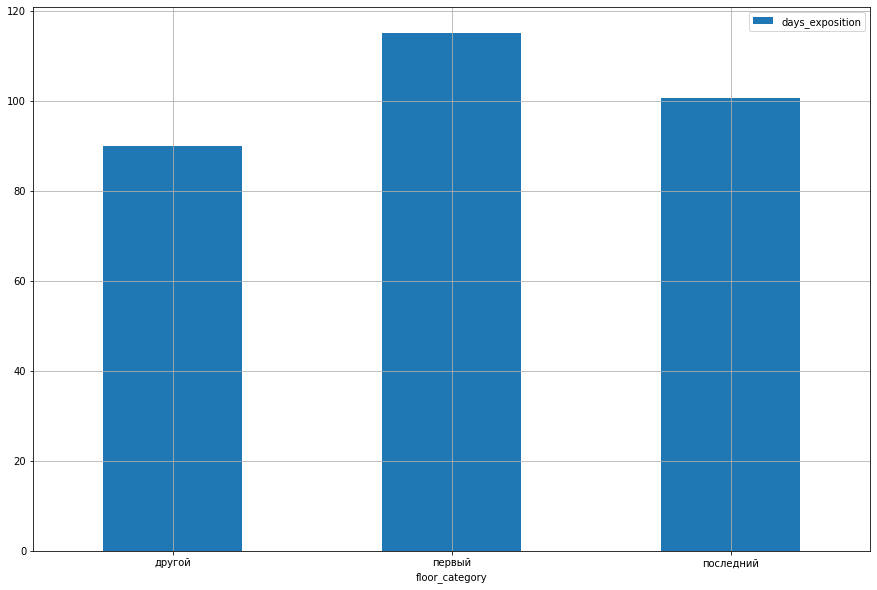

In [111]:
(
    data.pivot_table(index='floor_category', values='days_exposition', aggfunc = ('median'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10), rot = 0)
);

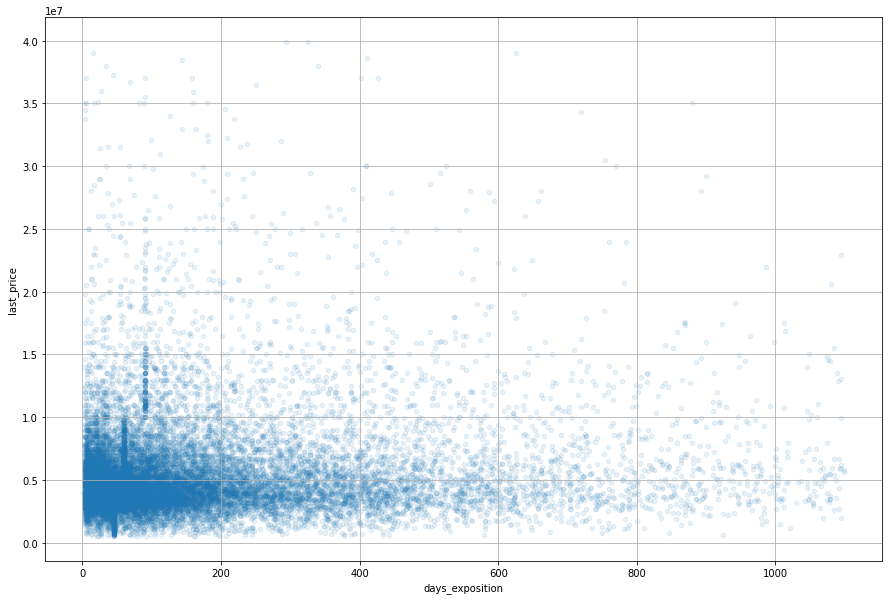

In [112]:
data.plot(kind = 'scatter', y = 'last_price', x = 'days_exposition', grid=True, figsize=(15, 10), alpha=0.1);

In [113]:
data['days_exposition'].describe()

count    19130.000000
mean       170.607057
std        196.472356
min          1.000000
25%         44.000000
50%         93.000000
75%        222.000000
max       1099.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет чуть больше полугода, медианное значение - около трех месяцев. По гистограмме чаще всего квартиры продаются в течение двух месяцев, чуть реже - трех, что совпадает с медианным значением срока продажи. Продажу квартиры от 250 дней можно считать долгой (75 квантиль равняется 222 дня), продажу квартиры менее 50 дней можно считать быстрой (25 квантиль равнятся 44 дня)

Время продажи квартиры с каждым годом уменьшалось. 

На сайте по размещению объявлений я посмотрела графы, которые обязан указать пользователь и получила следующие выводы.
От количества приложенных фотографий или цены время продажи не менялось.
Чем больше комнат в квартире, тем дольше она продавалась.
Дольше всего продаются квартиры на первом этаже.



#### Изучим зависимости цены от различных параметров

Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

In [115]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,month_exposition,year_exposition,cityCenters_nearest_km
total_images,1.000000,0.156259,0.121035,0.094690,0.028231,0.012186,0.107354,0.031479,0.015684,-0.025239,-0.025951,0.095363,0.050701,-0.001338,-0.042389,0.028702,-0.006621,-0.000321,0.002919,-0.022818,0.138452,0.005661,0.143242,-0.041801
last_price,0.156259,1.000000,0.767777,0.479028,0.497889,0.076887,0.661798,0.076084,0.017090,-0.049301,-0.034175,0.576798,0.033916,-0.037209,-0.337374,0.278278,0.027729,0.288183,-0.097054,0.099841,0.701575,0.004762,-0.020180,-0.338132
total_area,0.121035,0.767777,1.000000,0.790149,0.452882,-0.047708,0.925363,-0.024708,0.016967,-0.091276,-0.057059,0.553663,0.033300,-0.025740,-0.219563,0.170484,0.006701,0.179655,-0.063486,0.139245,0.164056,0.007899,-0.068099,-0.219969
rooms,0.094690,0.479028,0.790149,1.000000,0.232449,-0.228422,0.879322,-0.162565,-0.001052,-0.155340,-0.096811,0.178096,-0.007696,-0.056384,-0.152668,0.122961,-0.042083,0.092874,-0.033602,0.108346,-0.057941,-0.003461,-0.039967,-0.152576
ceiling_height,0.028231,0.497889,0.452882,0.232449,1.000000,-0.061298,0.396682,-0.033646,0.052267,0.013014,0.008483,0.410516,-0.077218,-0.110543,-0.357975,0.279029,-0.055968,0.253013,-0.143728,0.096127,0.349426,-0.004958,-0.088413,-0.358823
floors_total,0.012186,0.076887,-0.047708,-0.228422,-0.061298,1.000000,-0.169951,0.675106,-0.022194,0.073422,0.052970,0.261219,0.174234,0.115998,-0.001197,-0.154259,0.103251,-0.055976,0.060411,-0.050385,0.238492,0.017221,0.002350,-0.001572
living_area,0.107354,0.661798,0.925363,0.879322,0.396682,-0.169951,1.000000,-0.113584,0.009839,-0.065940,-0.039790,0.315031,0.003933,-0.055378,-0.210861,0.176088,-0.038011,0.154149,-0.049264,0.130527,0.071303,-0.004788,-0.057939,-0.211230
floor,0.031479,0.076084,-0.024708,-0.162565,-0.033646,0.675106,-0.113584,1.000000,-0.012080,0.038598,0.037425,0.186827,0.170515,0.079103,-0.001245,-0.102412,0.075169,-0.036966,0.042904,-0.038144,0.186119,0.019688,0.003129,-0.001532
is_apartment,0.015684,0.017090,0.016967,-0.001052,0.052267,-0.022194,0.009839,-0.012080,1.000000,-0.003254,-0.002210,0.019063,0.031594,0.020143,0.015086,0.009924,-0.023128,0.015665,0.005871,-0.005886,0.014629,-0.009182,0.023105,0.014936
studio,-0.025239,-0.049301,-0.091276,-0.155340,0.013014,0.073422,-0.065940,0.038598,-0.003254,1.000000,-0.004159,NaN,0.034773,-0.019882,-0.007828,-0.036026,0.012984,-0.013794,-0.001111,-0.016755,0.027010,0.000683,0.007232,-0.008302


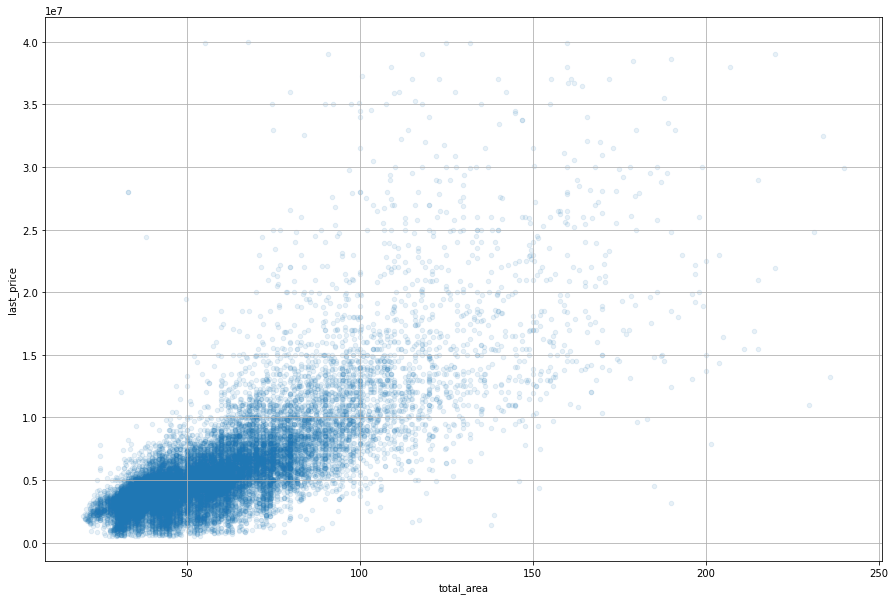

In [116]:
data.plot(kind = 'scatter', y = 'last_price', x = 'total_area', grid=True, figsize=(15, 10), alpha=0.1);

Прослеживается зависимость цены квартиры от ее общей площади. Чем больше площадь квартиры, тем она дороже. Коэффициент корреляции равняется 77%.

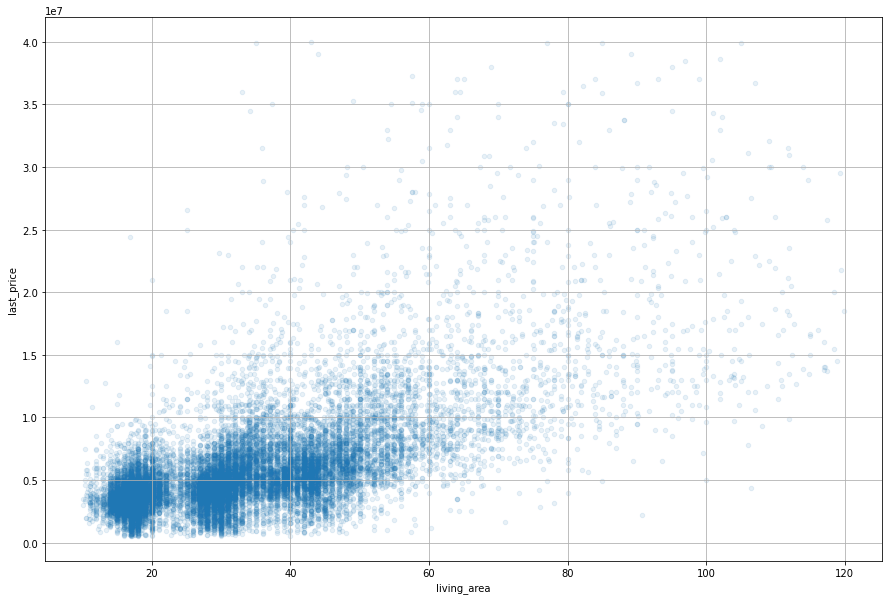

In [117]:
data.plot(kind = 'scatter', y = 'last_price', x = 'living_area', grid=True, figsize=(15, 10), alpha=0.1);

Прослеживается зависимость цены квартиры от ее жилой площади. Чем больше жилая площадь квартиры, тем она дороже. Коэффициент корреляции равняется 66%.

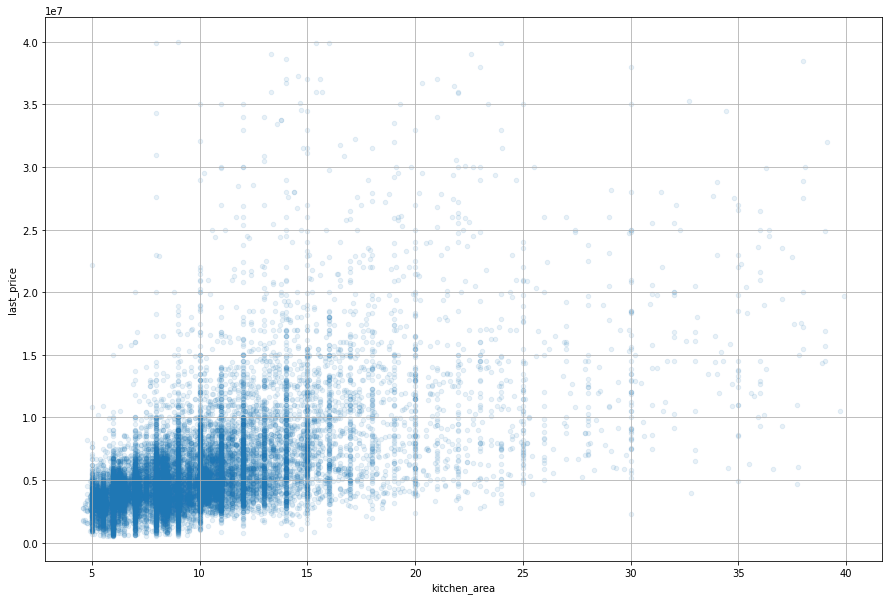

In [118]:
data.plot(kind = 'scatter', y = 'last_price', x = 'kitchen_area', grid=True, figsize=(15, 10), alpha=0.1);

Прослеживается зависимость цены квартиры от площади ее кухни. Чем больше площадь кухни в квартире, тем она дороже. Коэффициент корреляции равняется 58%.

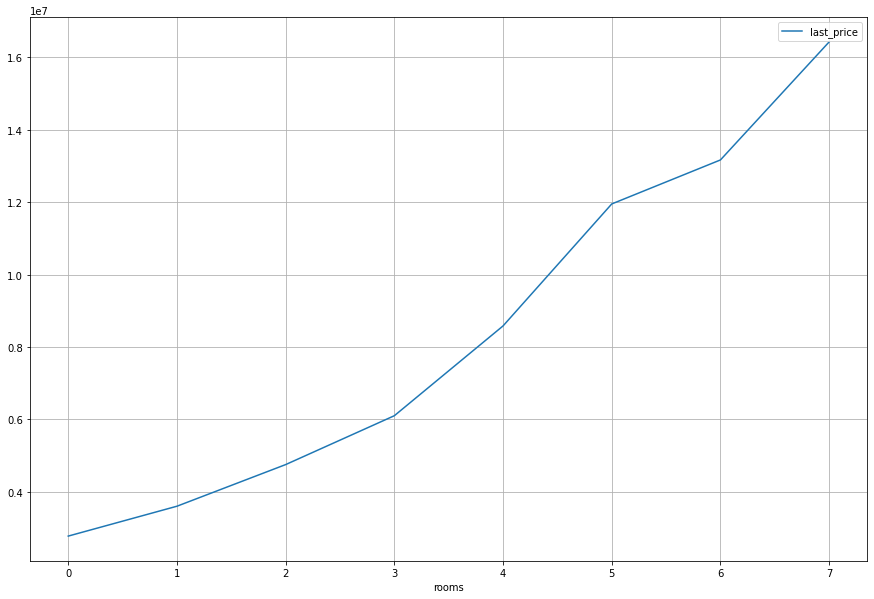

In [119]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

Прослеживается зависимость цены квартиры от количества комнат. Чем больше комнат в квартире, тем она дороже. Коэффициент корреляции равняется 48%.

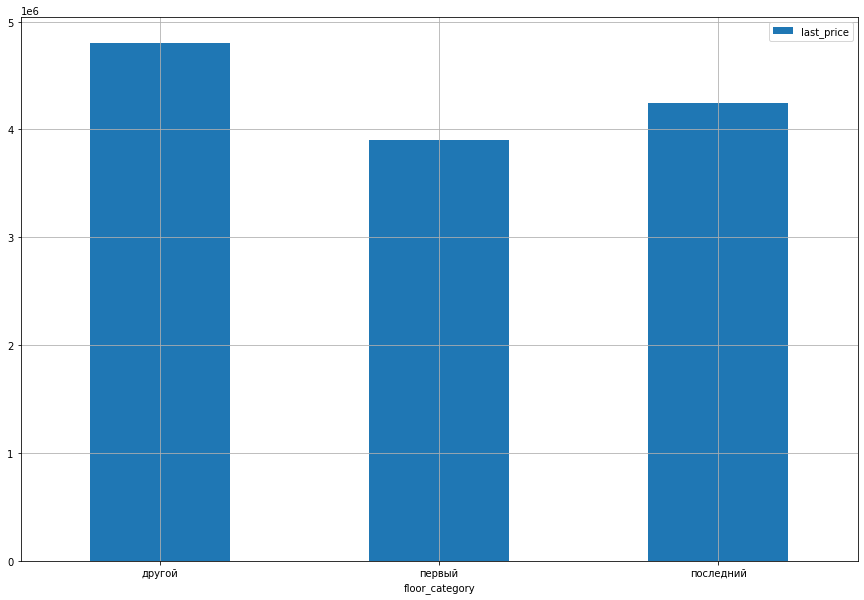

In [120]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc = ('median'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10), rot = 0)
);

Прослеживается зависимость цены квартиры от этажа, на котором она расположена. Чем выше этаж квартиры, тем она дороже.

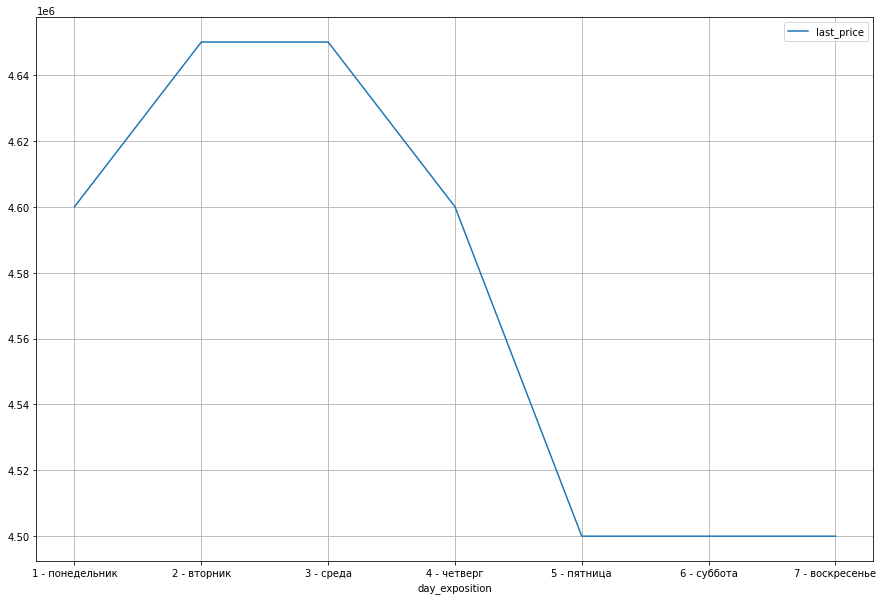

In [121]:
(
    data.pivot_table(index='day_exposition', values='last_price', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

Прослеживается зависимость цены квартиры от дня ее выставления на продажу. Квартиры, выставленные на продажу в будние дни, дороже, чем выставленные в выходняе. Квартиры, выставленные на продажу в середине недели - самые дорогие.

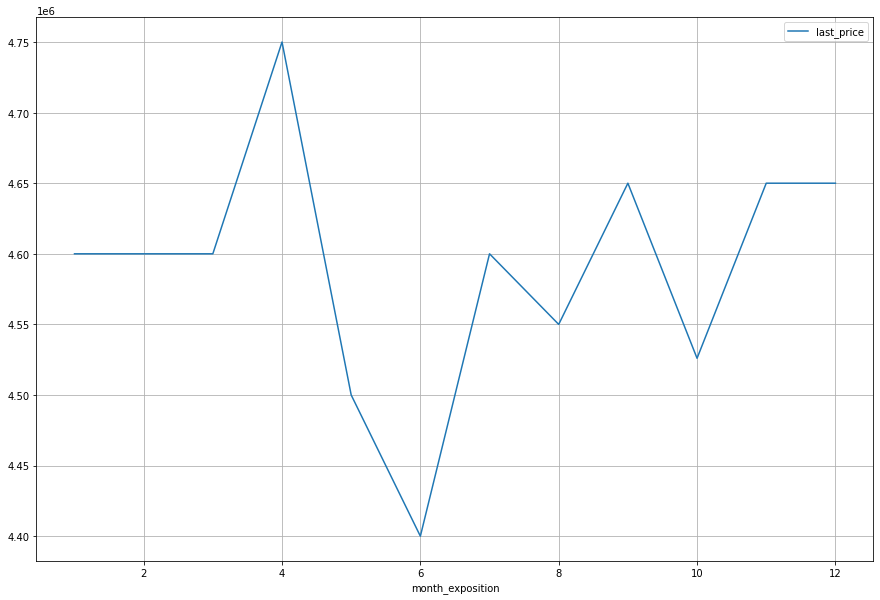

In [122]:
(
    data.pivot_table(index='month_exposition', values='last_price', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

Прослеживается зависимость цены квартиры от месяца ее выставления на продажу. Квартиры, выставленные на продажу продажу в Апреле - самые дорогие. Самые низкие цены на квартиры в июне.

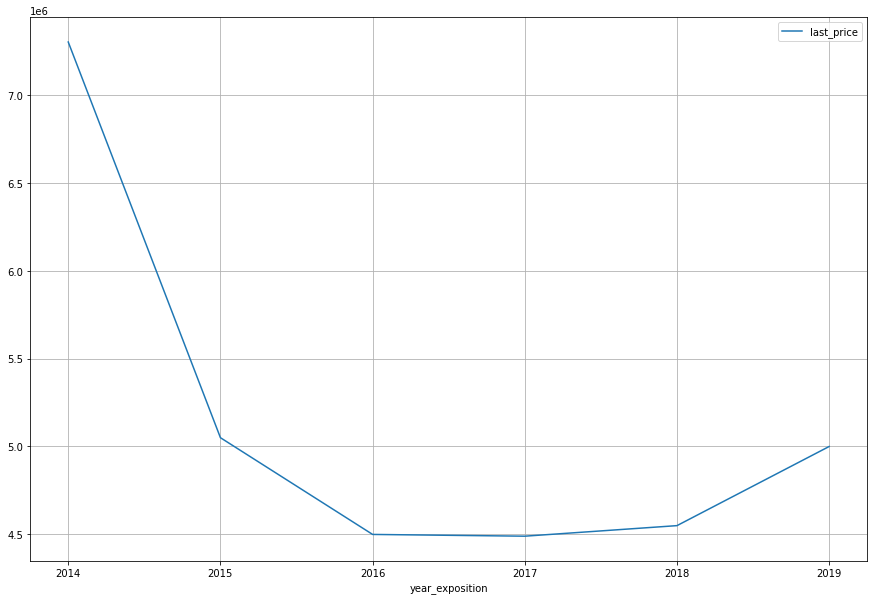

In [123]:
(
    data.pivot_table(index='year_exposition', values='last_price', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

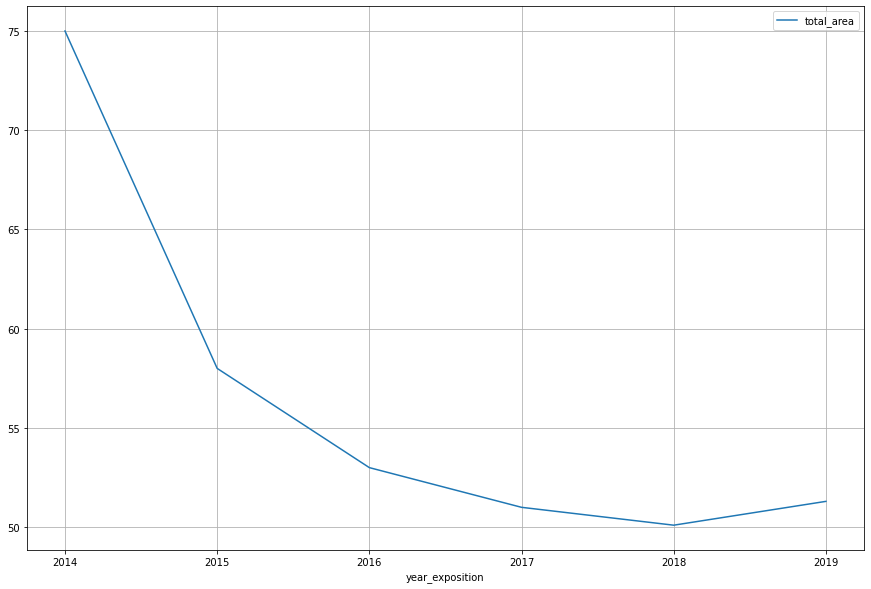

In [124]:
(
    data.pivot_table(index='year_exposition', values='total_area', aggfunc = ('median'))
    .plot(grid=True, figsize=(15, 10))
);

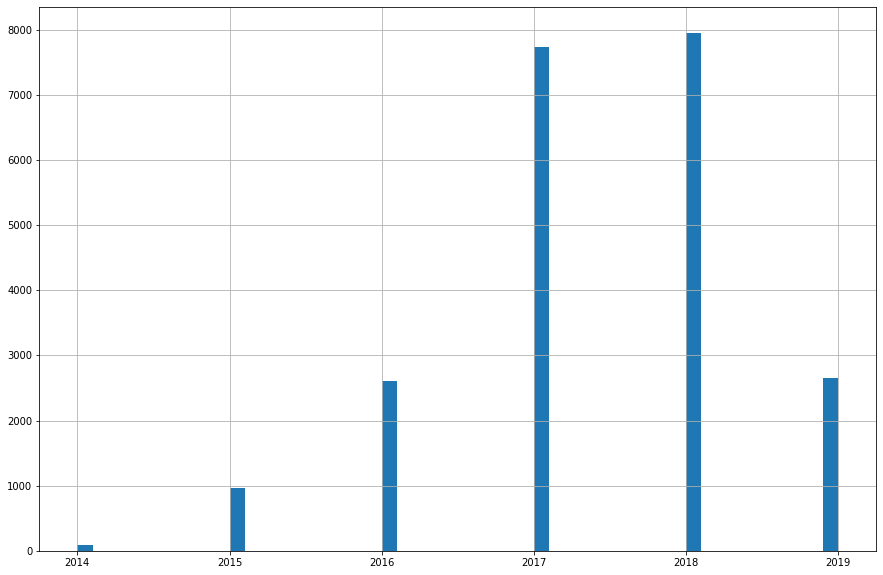

In [125]:
data['year_exposition'].hist(bins=50, figsize=(15, 10));

Замечено снижение цен на квартиры с 2014 по 2016 годы, с 2016 наблюдается небольшой рост. Площадь квартир, выставленных на продажу, уменьшалась до 2018 года, с 2018 наблюдается небольшой рост. Количество объявлений росло до 2018 года, псоле 2018 снижалось.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [126]:
(
    data.pivot_table(index = 'locality_name', values = 'price_one_square_meter', aggfunc = ['count', 'mean'])
    .sort_values(('count', 'price_one_square_meter'), ascending=False).head(10)
)

,count,mean
,price_one_square_meter,price_one_square_meter
locality_name,,
Санкт-Петербург,14570,110788.604622
п. Мурино,506,85580.278822
п. Шушары,428,78462.411156
Всеволожск,381,68650.986651
Пушкин,348,102838.437827
Колпино,334,75386.124365
п. Парголово,317,90151.078527
деревня Кудрово,288,92551.026848


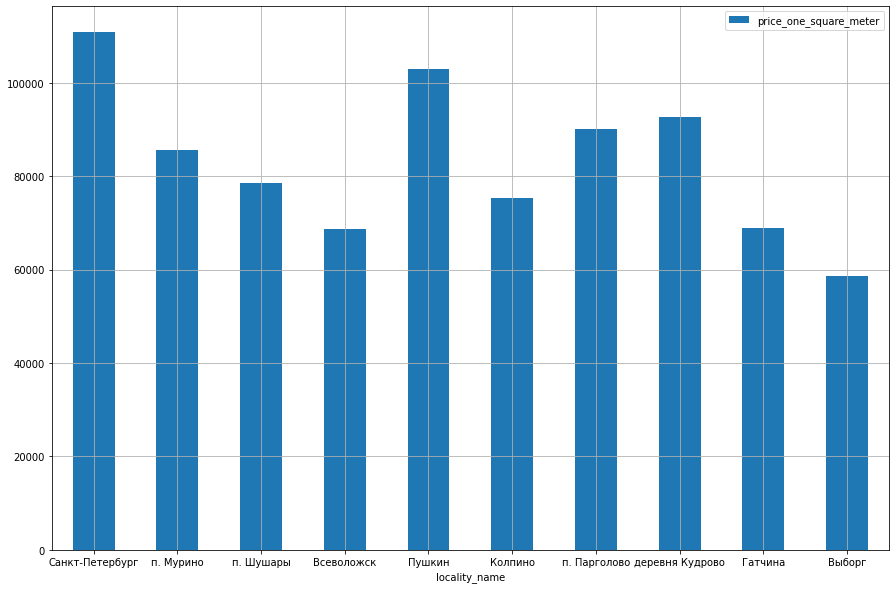

In [127]:
(
    data.pivot_table(index = 'locality_name', values = 'price_one_square_meter', aggfunc = ['count', 'mean'])
    .sort_values(('count', 'price_one_square_meter'), ascending=False).head(10)
    .plot(kind = 'bar', y = 'mean', grid=True, figsize=(15, 10), rot = 0)
);

Дороже всего квадратный метр жилья в Санкт-Петербурге, дешевле всего - в Выборге.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

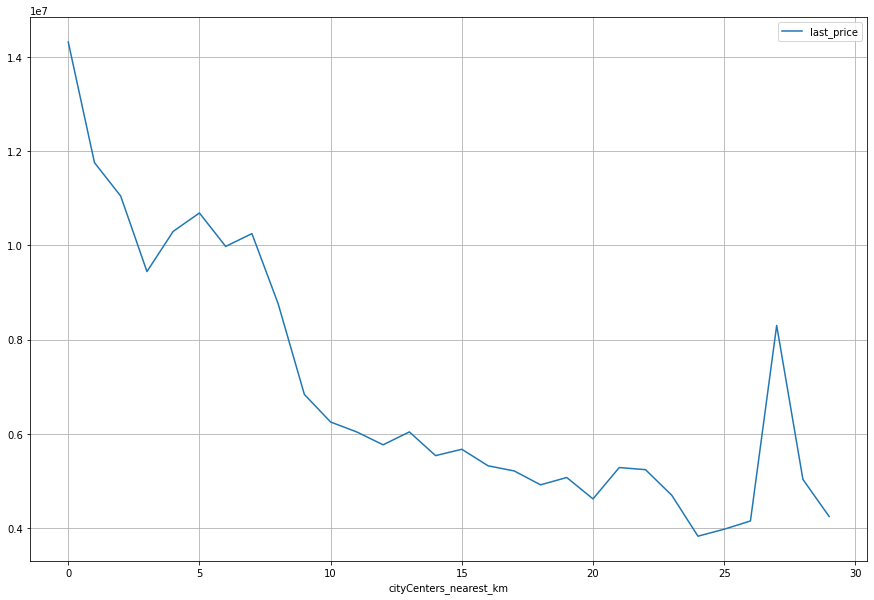

In [128]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
    .plot(grid=True, figsize=(15, 10))
);

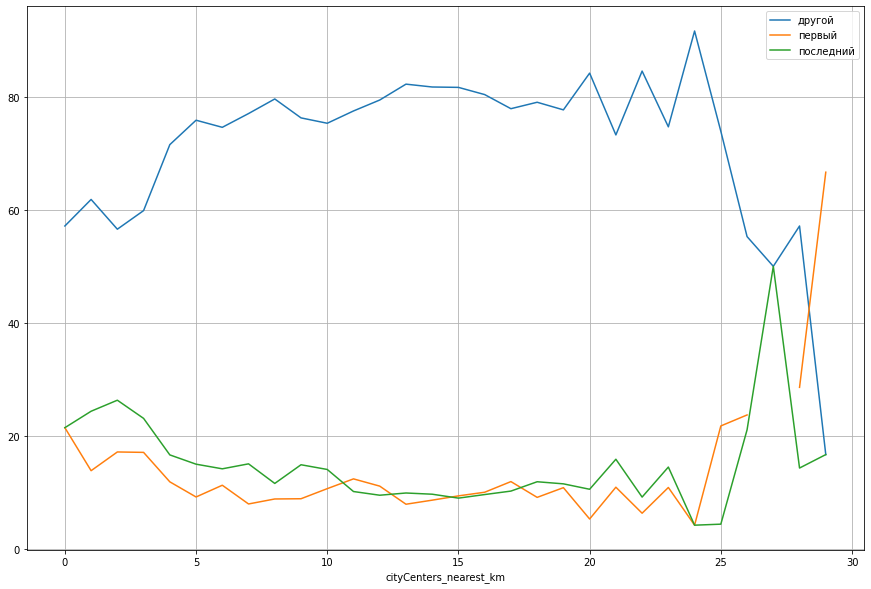

In [129]:
for name, df in data.query('locality_name == "Санкт-Петербург"').groupby('floor_category'):
        (
        (df.groupby('cityCenters_nearest_km')['cityCenters_nearest_km'].count() / 
         data.query('locality_name == "Санкт-Петербург"')
         .groupby('cityCenters_nearest_km')['cityCenters_nearest_km'].count() * 100)
         .plot(grid = True, figsize=(15, 10)) 
        );
plt.legend(['другой', 'первый', 'последний']);
       

In [130]:
data.query('cityCenters_nearest_km == 27 & last_price > 6000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
108,2,7497600,62.50,2015-12-08,2,NaN,5,35.50,5,False,False,False,9.50,0,Пушкин,14517.0,26670.0,1,517.0,0,NaN,1048.0,119961.600000,2 - вторник,12,2015,последний,27.0
138,8,16912000,105.70,2016-12-09,2,2.70,3,48.40,1,False,False,False,15.40,0,Пушкин,14352.0,26506.0,3,366.0,3,179.0,390.0,160000.000000,5 - пятница,12,2016,первый,27.0
430,9,8570000,72.00,2018-08-11,3,3.00,6,42.00,4,False,False,False,10.00,0,Пушкин,14691.0,26845.0,0,NaN,0,NaN,149.0,119027.777778,6 - суббота,8,2018,другой,27.0
726,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,NaN,128.0,193918.918919,2 - вторник,11,2017,другой,27.0
903,8,6650000,69.00,2017-06-20,3,3.20,3,50.00,2,False,False,False,7.00,0,Пушкин,14950.0,27104.0,1,27.0,0,NaN,261.0,96376.811594,2 - вторник,6,2017,другой,27.0
1108,1,8000000,84.40,2017-08-22,3,2.50,4,60.00,1,False,False,False,9.60,0,Пушкин,14528.0,26681.0,3,398.0,3,213.0,584.0,94786.729858,2 - вторник,8,2017,первый,27.0
2351,20,29500000,115.00,2017-07-21,3,3.00,2,69.75,2,False,False,False,19.20,4,Пушкин,14456.0,26609.0,3,229.0,3,172.0,328.0,256521.739130,5 - пятница,7,2017,последний,27.0
2396,15,7500000,78.00,2018-09-19,3,3.00,3,50.00,2,False,False,False,9.00,0,Пушкин,15298.0,27451.0,2,394.0,3,279.0,166.0,96153.846154,3 - среда,9,2018,другой,27.0
2702,8,10500000,105.00,2017-12-06,4,3.12,3,76.30,1,False,False,False,6.30,0,Пушкин,14880.0,27034.0,1,169.0,0,NaN,NaN,100000.000000,3 - среда,12,2017,первый,27.0
2870,23,11350000,75.00,2017-08-15,3,3.50,2,52.70,2,False,False,False,8.70,4,Пушкин,15337.0,27490.0,3,216.0,3,153.0,207.0,151333.333333,2 - вторник,8,2017,последний,27.0


Наблюдается спад стоимости квартиры с ее удалением от центра города.

Выброс на 27 километре связан с тем, что данные квартиры продаются в Пушкино. А жить рядом с царкосельским лицеем достаточно дорого.

Пики и провалы на графике изменения средней цены в зависимости от расстояния до центра связаны с изменением преобладания того или иного типа этажа. Видно, что на графике 'других' этажей при возникновении пика или провала, такой же возникает и на графике цены на том же самом километре.

Вывод: Был проведен исследовательский анализ данных: построены соответствующие гистограммы, графики и сводные таблицы, по которым были установлены зависимости.

### Общий вывод

В данном проекте был исследован датасет со статистикой о недвижимости — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Данный датасет был предобработан: были заполнены пропущенные значения, были обработаны аномальные значения, были изменены типы данных, были найдены и заменены дубликаты, были сформированы новые столбцы с категориями данных и новыми значениями. На основе обработанного датасета были сформулированы выводы о зависимостях на рынке недвижимости:

* По гистограмме общей площади квартиры можно сделать вывод, что наибольшее число объявлений выставлено о продаже квартир площадью 25-60 метров квадратных, и данную выборку целесообразно анализировать в дальнейшем. Наибольшее число объявлений выставлено о продаже квартир площадью около 40 метров квадратных. Квартиры с общей площадью больше 100 квадратных метров реже выставляются на продажу. Гистограмма похожа на распределение Пуассона.
* По гистограмме жилой площади можно сделать вывод, что чаще всего продают квартиры с жилой площадью 16-20 метров квадратных и 27-33 метров квадратных. Квартиры с жилой площадью больше 60 квадратных метров реже выставляются на продажу.
* По гистограмме площади кухни можно сделать вывод, что большая часть кухонь в продаваемых квартирах имеет площадь 6-10 метров квадратных, и данную выборку целесообразно анализировать в дальнейшем. Квартиры с кухнями больше 15 квадратных метров реже выставляются на продажу. Гистограмма похожа на распределение Пуассона.
* По гистограмме цены на момент снятия с продажи можно заметить ее сходство с распределнием Пуассона. Чаще всего приобретают квартиры в ценовом диапазоне 2.5 - 5.5 млн. рублей, реже всего при цене квартиры больше 15 млн. рублей.
* По гистограмме количества комнат видно, что чаще всего встречаются в продаже квартиры с 1, 2 и 3 комнатами. 
* По гистограмме высоты потолков видно, что большая часть квартир имеет высоту потолков 2.5 - 2.8 и 3 метра. Квартиры с высотой потолков 2.8 - 3 метра и 3 - 4 метра встречаются значительно реже.
* По гистограмме этажей, на которых расположены квартиры, можно заметить ее сходство с распределнием Пуассона. Чаще всего продают квартиры на 1-5 этажах, что связано с тем, что чаще всего продают квартиры в пятиэтажных зданиях (см. гистограмму количества этажей в здании). На втором месте по "популярности" квартиры на 6-9 этажах, что подтверждает связь с этажностю зданий (также см. гистограмму количества этажей в здании).
* По гистограмме типов этажей видно, что квартиры на первом и последнем этажах зданий продаются с примерно одинаковой частотой, но чаще всего продают квартиры на этажах кроме первого и последнего.
* Из гистограммы количества этажей в здании видно, что чаще всего выставляют на продажу квартиры в пяти- и девятиэтажных зданиях. Четырех-, десяти-, двенадцати- и шестнадцатиэтажные здания - вторые по популярности. Здания этажности, отличной от вышеперечисленных, встречаются значительно реже.
* Гистограмма удаленности квартир от центра имеет два пика, один из которых более узкий и отмечает удаленность от центра на расстояние около 5км, а второй - более широкий - на растояние от 12км до 16км. Квартиры на расстоянии около 2км и 18км - 35км выставляются на продажу с примерно одинаковой частотой. Квартиры, расположенные в менее, чем 1км от центра и более чем в 35км продаются одинаково редко по сравнению с остальными.
* Гистограмма близости к аэропорту показывает, что квартиры на расстоянии около 30км и более 37км от аэропорта одинаково непопулярны среди покупателей. Также квартиры с самым близким расположением к аэропорту редко выставляются на продажу.
* Гистограмма близости к паркам показывает, что чаще всего продаются квартиры на расстоянии от 150 до 650 метров до ближайшего парка. При расстоянии более 1 км. объявлений о продаже значительно меньше.
* Гистограмма дней выставления объявления показывает, что реже всего выставляют квартиры на продажу в выходные, а понедельник, среда и пятница чуть менее популярны для выставления объявления о продаже, чем вторник и четверг.
* Гистограмма месяцев выставления объявления о продаже показывает, что Декабрь, Январь, Май и Июнь менее популярны, чем остальные месяцы в году. Большее число объявлений выставляется в холодное время года, т.е. с Февраля по Апрель и в Октябре и Ноябре, нежели в теплое время года.


* Среднее время продажи квартиры составляет чуть больше полугода, медианное значение - около трех месяцев. По гистограмме чаще всего квартиры продаются в течение двух месяцев, чуть реже - трех, что совпадает с медианным значением срока продажи. Продажу квартиры от 250 дней можно считать долгой (75 квантиль равняется 222 дня), продажу квартиры менее 50 дней можно считать быстрой (25 квантиль равнятся 44 дня)
* Время продажи квартиры с каждым годом уменьшалось. 
* На сайте по размещению объявлений я посмотрела графы, которые обязан указать пользователь и получила следующие выводы. От количества приложенных фотографий или цены время продажи не менялось. Чем больше комнат в квартире, тем дольше она продавалась. Дольше всего продаются квартиры на первом этаже.


* Прослеживается зависимость цены квартиры от ее общей площади. Чем больше площадь квартиры, тем она дороже. Коэффициент корреляции равняется 77%.
* Прослеживается зависимость цены квартиры от ее жилой площади. Чем больше жилая площадь квартиры, тем она дороже. Коэффициент корреляции равняется 66%.
* Прослеживается зависимость цены квартиры от площади ее кухни. Чем больше площадь кухни в квартире, тем она дороже. Коэффициент корреляции равняется 58%.
* Прослеживается зависимость цены квартиры от количества комнат. Чем больше комнат в квартире, тем она дороже. Коэффициент корреляции равняется 48%.
* Прослеживается зависимость цены квартиры от этажа, на котором она расположена. Чем выше этаж квартиры, тем она дороже.
* Прослеживается зависимость цены квартиры от дня ее выставления на продажу. Квартиры, выставленные на продажу в будние дни, * дороже, чем выставленные в выходняе. Квартиры, выставленные на продажу в середине недели - самые дорогие.
* Прослеживается зависимость цены квартиры от месяца ее выставления на продажу. Квартиры, выставленные на продажу продажу в Апреле - самые дорогие. Самые низкие цены на квартиры в июне.
* Замечено снижение цен на квартиры с 2014 по 2016 годы, с 2016 наблюдается небольшой рост. Площадь квартир, выставленных на продажу, уменьшалась до 2018 года, с 2018 наблюдается небольшой рост. Количество объявлений росло до 2018 года, псоле 2018 снижалось.


* Дороже всего квадратный метр жилья в Санкт-Петербурге, дешевле всего - в Выборге.


* Наблюдается спад стоимости квартиры с ее удалением от центра города.
* Выброс на 27 километре связан с тем, что данные квартиры продаются в Пушкино. А жить рядом с царкосельским лицеем достаточно дорого.
* Пики и провалы на графике изменения средней цены в зависимости от расстояния до центра связаны с изменением преобладания того или иного типа этажа. Видно, что на графике 'других' этажей при возникновении пика или провала, такой же возникает и на графике цены на том же самом километре.